In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('tensorflow version:',tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import PIL
print('PIL version:',PIL.__version__)
import os
import numpy as np
print('numpy version:',np.__version__)
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib version:',matplotlib.__version__)
import tensorflow_hub as hub
from keras import applications

import warnings
warnings.filterwarnings("ignore")

# Shared Input Layer
#from keras.utils import plot_model
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Lambda
from keras.layers import Dense
from keras.layers import Flatten, Dropout, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras import backend
#from google.colab import drive
from keras.callbacks import ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator

2023-07-04 14:25:15.313563: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1
tensorflow version: 2.9.2
PIL version: 7.1.2
numpy version: 1.21.6
matplotlib version: 3.2.2


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul  4 14:25:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 4000     Off  | 00000000:3B:00.0  On |                  N/A |
| 30%   46C    P5    19W / 125W |    287MiB /  7979MiB |     34%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
# # # Creating Train / Val / Test folders (One time use)
# import os
# import numpy as np
# import shutil
# import random
# root_dir = '/home/mishra/Documents/Ayesha/Ayesha 2/complete Dataset' # data root path
# classes_dir = ['BD Normal'] #total labels

# val_ratio = 0.10
# test_ratio = 0.10

# for cls in classes_dir:
#     os.makedirs(root_dir +'train_/' + cls)
#     os.makedirs(root_dir +'val_/' + cls)
#     os.makedirs(root_dir +'test_/' + cls)


# # Creating partitions of the data after shuffeling
# src = root_dir +'/'+cls # Folder to copy images from

# allFileNames = os.listdir(src)
# np.random.shuffle(allFileNames)
# train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                           [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
#                                                            int(len(allFileNames)* (1 - test_ratio))])


# train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
# val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
# test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

# print('Total images: ', len(allFileNames))
# print('Training: ', len(train_FileNames))
# print('Validation: ', len(val_FileNames))
# print('Testing: ', len(test_FileNames))

# # Copy-pasting images
# for cls in classes_dir:
#        # Copy-pasting images
#         for name in train_FileNames:
#               shutil.copy(name, root_dir +'train_/' + cls)

#         for name in val_FileNames:
#               shutil.copy(name, root_dir +'val_/' + cls)

#         for name in test_FileNames:
#                shutil.copy(name, root_dir +'test_/' + cls)

In [5]:
# # # Creating Train / Val / Test folders (One time use)
# import os
# import numpy as np
# import shutil
# import random
# root_dir = '/home/mishra/Documents/Ayesha/Ayesha 2/complete Dataset' # data root path
# classes_dir = ['BD Parallel'] #total labels

# val_ratio = 0.10
# test_ratio = 0.10

# for cls in classes_dir:
#     os.makedirs(root_dir +'train_/' + cls)
#     os.makedirs(root_dir +'val_/' + cls)
#     os.makedirs(root_dir +'test_/' + cls)


# # Creating partitions of the data after shuffeling
# src = root_dir +'/'+cls # Folder to copy images from

# allFileNames = os.listdir(src)
# np.random.shuffle(allFileNames)
# train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                           [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
#                                                            int(len(allFileNames)* (1 - test_ratio))])


# train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
# val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
# test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

# print('Total images: ', len(allFileNames))
# print('Training: ', len(train_FileNames))
# print('Validation: ', len(val_FileNames))
# print('Testing: ', len(test_FileNames))

# for cls in classes_dir:
#        # Copy-pasting images
#         for name in train_FileNames:
#               shutil.copy(name, root_dir +'train_/' + cls)

#         for name in val_FileNames:
#               shutil.copy(name, root_dir +'val_/' + cls)

#         for name in test_FileNames:
#                shutil.copy(name, root_dir +'test_/' + cls)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_dataset = train_datagen.flow_from_directory(
        '/home/mishra/Documents/Ayesha/Ayesha 2/complete Datasettrain_',
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical',
         color_mode = 'rgb')

Found 28723 images belonging to 2 classes.


In [8]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
validation_dataset = validation_datagen.flow_from_directory(
        '/home/mishra/Documents/Ayesha/Ayesha 2/complete Datasetval_',
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical',
         color_mode = 'rgb')


Found 3590 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
test_dataset = test_datagen.flow_from_directory(
     '/home/mishra/Documents/Ayesha/Ayesha 2/complete Datasettest_',
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
        class_mode='categorical',
         color_mode = 'rgb')

Found 3591 images belonging to 2 classes.


In [12]:
for image_batch, label_batch in train_dataset:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 224, 224, 3)
(32, 2)


In [13]:
class_names_train = train_dataset.class_indices
print(class_names_train)
class_names_validation = validation_dataset.class_indices
print(class_names_validation)

{'BD Normal': 0, 'BD Parallel': 1}
{'BD Normal': 0, 'BD Parallel': 1}


In [14]:
base_model1 = tf.keras.applications.ResNet50(weights='imagenet',
                                include_top=False, 
                                input_shape=(224, 224,3))

2023-07-04 14:25:20.389223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 14:25:21.256274: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6380 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:3b:00.0, compute capability: 7.5


In [15]:
base_model1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [16]:
num = 2

model1= tf.keras.Sequential([
      base_model1,
     layers.Flatten(),
     #layers.Dense(512, activation='relu'),
     layers.Dropout(0.5),
  tf.keras.layers.Dense(num, activation = 'softmax' )
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 23,735,298
Non-trainable params: 53,120
_________________________________________________________________


In [17]:
optimizers = tf.keras.optimizers.Adam(learning_rate = 0.00001)

model1.compile(
  optimizer=optimizers,
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
  metrics=['acc'])

history= model1.fit(train_dataset, 
                   validation_data = validation_dataset, 
                   epochs= 50)

Epoch 1/50


2023-07-04 14:25:33.725966: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


898/898 [==============================] - 254s 269ms/step - loss: 0.2612 - acc: 0.9163 - val_loss: 1.0101 - val_acc: 0.7747
Epoch 2/50
898/898 [==============================] - 246s 274ms/step - loss: 0.0499 - acc: 0.9838 - val_loss: 0.0700 - val_acc: 0.9783
Epoch 3/50
898/898 [==============================] - 245s 273ms/step - loss: 0.0236 - acc: 0.9922 - val_loss: 0.0259 - val_acc: 0.9919
Epoch 4/50
898/898 [==============================] - 245s 273ms/step - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0242 - val_acc: 0.9911
Epoch 5/50
898/898 [==============================] - 244s 272ms/step - loss: 0.0084 - acc: 0.9967 - val_loss: 0.0187 - val_acc: 0.9950
Epoch 6/50
898/898 [==============================] - 242s 270ms/step - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0143 - val_acc: 0.9947
Epoch 7/50
898/898 [==============================] - 242s 270ms/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0126 - val_acc: 0.9961
Epoch 8/50
898/898 [==============================] - 243s 

In [18]:
model1.save("Resnet_new.h5")

In [19]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model("model_VGG16_unseen_final_mixed.h5")

# # Perform evaluation on a test dataset
# test_loss, test_accuracy = loaded_model.evaluate(test_dataset)

# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)

# # Make predictions on new data
# #predictions = loaded_model.predict(new_data)


In [20]:
# #Make predictions on new data
# predictions = loaded_model.predict(test_dataset)


In [21]:
model1.evaluate(test_dataset)

113/113 [==============================] - 21s 182ms/step - loss: 0.0042 - acc: 0.9992


[0.004217136185616255, 0.9991645812988281]

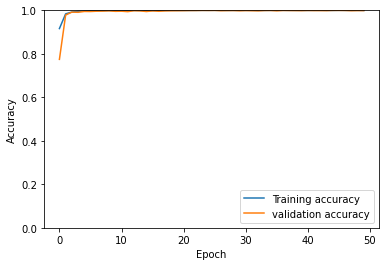

In [22]:
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.savefig('resnet_acc_new.png',bbox_inches=None)
plt.show()

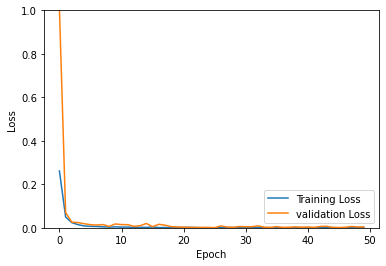

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.savefig('Resnet_loss_new.png',bbox_inches=None)
plt.show()

In [24]:
# print('Validate the model')
# final_result = loaded_model.evaluate(
#     validation_dataset,
#     #steps = 3590
# )

In [25]:
# from time import time

In [26]:
# t0 = time()
# #validation_dataset.reset()
# val_predict = loaded_model.predict(
#     validation_dataset,
# #     steps = 3590,
#     verbose = 1)
# print('Time taken to evaluate the model:',int(time()-t0),'seconds')

In [27]:
# validation_samples = val_predict.shape[0]
# print('Number of data points in validation set:',validation_samples)

In [28]:
# val_predicted_classes = np.argmax(val_predict, axis = 1)
# val_true_classes = validation_dataset.classes
# val_class_labels = list(validation_dataset.class_indices.keys())

In [29]:
import sklearn.metrics as metrics

In [30]:
# validation_report = metrics.classification_report(val_true_classes, val_predicted_classes, target_names=val_class_labels)
# print('The validation report is as follows:')
# print(validation_report)

In [31]:
# val_conf_matrix = tf.math.confusion_matrix(labels=val_true_classes, predictions=val_predicted_classes).numpy()
# print(val_conf_matrix)

In [32]:
 import seaborn as sns

In [33]:
# figure1 = plt.figure()
# val_conf_matrix = val_conf_matrix.astype('float') / val_conf_matrix.sum(axis=1)[:, np.newaxis]
# sns.heatmap(val_conf_matrix, annot = True, cmap=plt.cm.Greens)
# plt.tight_layout()
# plt.ylabel('True Label')
# plt.xlabel('Predicted label')
# plt.savefig('Validation data Confusion Matrix', dpi=250)

In [34]:
print('Testing the model')
final_result = model1.evaluate(
    test_dataset,
    #steps = 3591
)

Testing the model
113/113 [==============================] - 21s 185ms/step - loss: 0.0042 - acc: 0.9992


In [35]:
#test_dataset.reset()
predict_on_test_data = model1.predict(
    test_dataset,
    #steps = 3591,
    verbose = 1
)

113/113 [==============================] - 22s 182ms/step


In [36]:
print('Number of data points in test set:',predict_on_test_data.shape[0])

Number of data points in test set: 3591


In [37]:
predicted_classes = np.argmax(predict_on_test_data,axis=1)
predict_true_classes = test_dataset.classes
predict_class_labels = list(test_dataset.class_indices.keys())

In [38]:
test_report = metrics.classification_report(predict_true_classes, predicted_classes, target_names = predict_class_labels)
print(test_report)

              precision    recall  f1-score   support

   BD Normal       1.00      1.00      1.00      1936
 BD Parallel       1.00      1.00      1.00      1655

    accuracy                           1.00      3591
   macro avg       1.00      1.00      1.00      3591
weighted avg       1.00      1.00      1.00      3591



In [39]:
test_confusion_matrix = tf.math.confusion_matrix(labels=predict_true_classes,predictions = predicted_classes).numpy()
print(test_confusion_matrix)

[[1934    2]
 [   1 1654]]


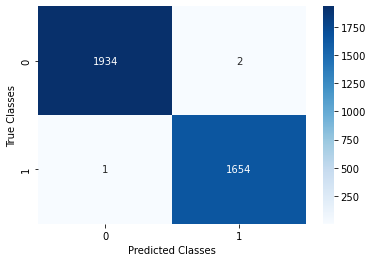

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_confusion_matrix = tf.math.confusion_matrix(labels=predict_true_classes, predictions=predicted_classes).numpy()

sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()
plt.show()

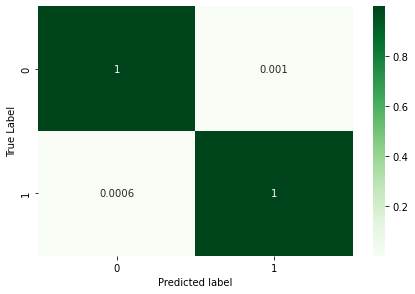

In [43]:
figure1 = plt.figure()
test_confusion_matrix = test_confusion_matrix.astype('float') / test_confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(test_confusion_matrix, annot = True, cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()